In [1]:
from BPt import Dataset, BPt_ML
import pandas as pd
from BPt import CV

In [2]:
def load_base_df():
    
    na_vals = [' ', '  ', 'nan', 'NaN']
    
    # Load first part of data
    d1 = pd.read_excel('/home/sage/Downloads/e1.xlsx', na_values=na_vals)
    d2 = pd.read_excel('/home/sage/Downloads/e2.xlsx', na_values=na_vals)
    df = pd.concat([d1, d2])

    df['Subject'] = df['Subject'].astype('str')
    df.rename({'Subject': 'subject'}, axis=1, inplace=True)
    df.set_index('subject', inplace=True)

    # Load second part
    df2 = pd.read_excel('/home/sage/Downloads/e3.xlsx', na_values=na_vals)
    df2['Subject ID'] = df2['Subject ID'].astype('str')
    df2.rename({'Subject ID': 'subject'}, axis=1, inplace=True)
    df2.set_index('subject', inplace=True)

    # Merge
    data = df2.merge(df, on='subject', how='outer')
    
    data = data.rename({'Sex_y': 'Sex', 'Age_y': 'Age'}, axis=1)
    
    return data

In [3]:
df = load_base_df()

In [4]:
ML = BPt_ML('Enigma_Alc',
             log_dr = None,
             n_jobs = 8)

ML.Set_Default_Load_Params(subject_id = 'subject',
                           na_values = [' ', '  ', 'nan', 'NaN'],
                           drop_na = .5)

ML.Load_Data(df=df,
             drop_keys = ['Unnamed:', 'Site', 'Half', 'PI', 'Dependent',
                          'Surface Area', 'Thickness', 'ICV', 'Subcortical',
                          'Sex', 'Age', 'Primary Drug', 'Education', 'Handedness'],
             inclusion_keys=None,
             unique_val_warn=None,
             clear_existing=True)

ML.Load_Targets(df=df,
                col_name = 'Dependent any drug',
                data_type = 'b')

ML.Load_Covars(df=df,
               col_name = ['ICV', 'Sex', 'Age'],
               drop_na = False,
               data_type = ['f', 'b', 'f'])


ML.Load_Covars(df = df,
               col_name = ['Education', 'Handedness'],
               data_type = ['f', 'b'],
               drop_na = False,
               filter_outlier_std = 10)

ML.Load_Strat(df=df,
              col_name=['Sex', 'Site'],
              binary_col=[True, False]
              )

ML.Prepare_All_Data()

group_site_cv = CV(groups='Site')
ML.Train_Test_Split(test_size = .2, cv=group_site_cv)

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


exp_name = Enigma_Alc
log_dr = None
existing_log = append
verbose = True
exp log dr setup at: None
log file at: None
Default params set:
notebook = True
use_abcd_subject_ids = False
low memory mode = False
strat_u_name = _Strat
random state = 534
n_jobs = 8
dpi = 100
mp_context = loky
BPt_ML object initialized
Default load params set within self.default_load_params.
----------------------
dataset_type: basic
subject_id: subject
eventname: None
eventname_col: eventname
overlap_subjects: False
merge: inner
na_values: [' ', '  ', 'nan', 'NaN']
drop_na: 0.5
drop_or_na: drop

Cleared loaded data.

Loading from df or files

Dropped 63 columns per passed drop_keys argument
Dropped 1 cols for all missing values
Dropped 532 rows for missing values, based on the provided drop_na param: 0.5 with actual na_thresh: 80
Loaded rows with NaN remaining: 2993
Loaded NaN Info:
There are: 21064 total missing values
23 columns found with 3 missing values (column name overlap: ['_thickavg'])
13 columns foun

In [5]:
# Cast to dataset
data = Dataset(df)
data.verbose = 1

# Drop non relevant columns
data.drop_cols_by_nan(threshold=.5)
data.drop_cols(scope='Dependent', inclusions='any drug')
data.drop_cols(exclusions=['Half', '30 days', 'Site ',
                           'Sex_', 'Age_', 'Primary Drug', 'ICV.'])

# Set binary vars as categorical
data.auto_detect_categorical()
data.to_binary(scope='category')

# Set target and drop any NaNs
data.set_role('Dependent any drug', 'target')
data.drop_nan_subjects('target')

# Save this set of vars under scope covars
data.add_scopes(['ICV', 'Sex', 'Age', 'Education', 'Handedness'], 'covars')
print('scope covars = ', data.get_cols('covars'))

# Set site as non input
data.set_role('Site', 'non input')
data.ordinalize(scope='non input')

# Drop subjects with too many NaN's and big outliers
data.drop_subjects_by_nan(threshold=.5, scope='all')
data.filter_outliers_by_std(n_std=10, scope='float')

Setting NaN threshold to: 1762.5
Dropped: 20 columns
Dropped: 3 columns
Dropped: 36 columns
Num. categorical variables in dataset: 3
Dropped: 479
scope covars =  ['Handedness', 'Education', 'Sex', 'Age', 'ICV']
Setting NaN threshold to: 82.5
Dropped: 38
Dropped: 5


,Handedness,Education,Dependent any drug,Sex,Age,ICV,Site,Lthal,Rthal,Lcaud,...,R_superiortemporal_thickavg,R_supramarginal_thickavg,R_frontalpole_thickavg,R_temporalpole_thickavg,R_transversetemporal_thickavg,R_insula_thickavg,LThickness.1,RThickness.1,LSurfArea.1,RSurfArea.1
subject,,,,,,,,,,,,,,,,,,,,,
ETOH_M06158716-289388-1,0.0,16.0,1.0,1.0,24.0,15.5,0,8363.4,7821.7,3264.8,...,2.765,2.510,2.713,3.619,2.276,3.066,2.45053,2.41869,82680.6,82268.0
ETOH_M87100099-289389-1,0.0,16.0,1.0,1.0,28.0,16.2,0,7608.4,7058.6,3988.5,...,2.637,2.482,2.746,3.709,2.188,2.772,2.42881,2.40955,84510.3,85251.3
ETOH_M87100246-289390-1,1.0,16.0,1.0,0.0,31.0,17.5,0,8798.6,7745.9,3875.9,...,2.791,2.417,2.325,4.039,2.543,3.051,2.42430,2.36666,87506.2,89467.6
ETOH_M87100348-289391-1,0.0,NaN,1.0,0.0,21.0,19.4,0,9258.6,8599.7,4324.8,...,3.161,2.785,2.566,4.369,2.721,3.015,2.62463,2.60833,103936.0,104367.0
ETOH_M87100391-289392-1,0.0,13.0,1.0,1.0,28.0,15.0,0,7411.4,6825.9,3343.8,...,2.937,2.751,2.761,3.828,2.791,3.090,2.64007,2.59839,75620.6,75177.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8516_3.cross.8516,NaN,NaN,1.0,1.0,19.0,15.3,24,7091.0,7113.0,3954.0,...,3.207,3.023,2.786,4.055,2.948,3.599,NaN,NaN,NaN,NaN
915_3.cross.915,NaN,NaN,0.0,0.0,19.0,14.3,24,6567.0,7096.0,3832.0,...,2.963,2.791,3.076,3.031,2.476,3.117,NaN,NaN,NaN,NaN
9311_3.cross.9311,NaN,NaN,0.0,0.0,19.0,15.4,24,8091.0,7629.0,3654.0,...,3.222,3.044,2.378,3.756,2.738,3.150,NaN,NaN,NaN,NaN


Site
Found 3003 valid subjects.



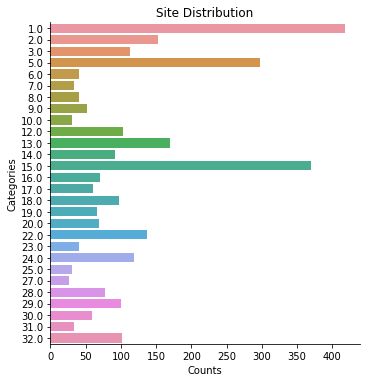

In [6]:
data.plot('Site')